<a href="https://colab.research.google.com/github/Janina712/MLTSA22_JBoecher/blob/main/HW2/HW2_JBoecher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imports we have already seen
import pandas as pd
import numpy as np
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
#new imports we will learn to use
import statsmodels.api as sm # for the statistical analysis to find out if the TS is stationary
import glob #to sort files
from pandas.plotting import scatter_matrix #will make useful correlatin plots
import json #reads and writes json files, see programmatic data access notebooks
import os #this runs system level commands, see programmatic data access notebooks

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#some annoying wornings show up - suppress them with this
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pl.style.use("https://raw.githubusercontent.com/fedhere/MLTSA22_FBianco/master/fbb.mplstyle")

# data ingestion

use kaggle economic data accessing it programmatically at
https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs/data#a.us.txt

Access it programmatically as was done for the TESLA data in https://github.com/fedhere/MLTSA22_FBianco/blob/main/Lab3ProgrammaticDataAccess/Kaggledata_load.ipynb

Save it in a directory called MLTSA22/HW2/data in your google drive 


In [ ]:
# connect your google colab notebook to your google drive
from google.colab import drive
drive.mount("/content/gdrive")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!pip install kaggle

In [ ]:
# show current working directory
!pwd

# change current working directory
%cd /content/gdrive/MyDrive/MLTSA22/HW2/Data

!pwd

/content
/content


In [ ]:
!ls /content/gdrive/MyDrive/MLTSA22/HW2/Data

In [ ]:
# make Kaggle account
!ls /content/gdrive/MyDrive/.kaggle

kaggle.json  MLTSA22


In [ ]:
!chmod 600 /content/gdrive/MyDrive/.kaggle/kaggle.json

In [ ]:
#set an variable in your system that saves your data from kaggle.json
import json
import os
envs = json.load(open("/content/gdrive/MyDrive/.kaggle/kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

os.environ
#!cd /content/gdrive/MyDrive/.kaggle
#!pwd
!kaggle datasets

usage: kaggle datasets [-h]
                       {list,files,download,create,version,init,metadata,status}
                       ...
kaggle datasets: error: too few arguments


In [ ]:
# !kaggle datasets list -s stock

ref                                                       title                                      size  lastUpdated          downloadCount  
--------------------------------------------------------  ----------------------------------------  -----  -------------------  -------------  
mattiuzc/stock-exchange-data                              Stock Exchange Data                         5MB  2021-06-07 20:51:55          13600  
borismarjanovic/price-volume-data-for-all-us-stocks-etfs  Huge Stock Market Dataset                 492MB  2017-11-16 14:53:29          84133  
dgawlik/nyse                                              New York Stock Exchange                    31MB  2017-02-22 10:18:25          63196  
jacksoncrow/stock-market-dataset                          Stock Market Dataset                      522MB  2020-04-02 10:55:57          11966  
hk7797/stock-market-india                                 Stock Market India                          1GB  2021-01-02 03:44:23          

In [ ]:
# make directory to put the data you download from kaggle
!mkdir /content/gdrive/MyDrive/.kaggle/MLTSA22

%cd /content/gdrive/MyDrive/.kaggle/MLTSA22

!mkdir /content/gdrive/MyDrive/.kaggle/MLTSA22/HW2

%cd /content/gdrive/MyDrive/.kaggle/MLTSA22/HW2

!mkdir /content/gdrive/MyDrive/.kaggle/MLTSA22/HW2/data

%cd /content/gdrive/MyDrive/.kaggle/MLTSA22/HW2/data


mkdir: cannot create directory ‘/content/gdrive/MyDrive/.kaggle/MLTSA22’: File exists
/content/gdrive/MyDrive/.kaggle/MLTSA22
mkdir: cannot create directory ‘/content/gdrive/MyDrive/.kaggle/MLTSA22/HW2’: File exists
/content/gdrive/MyDrive/.kaggle/MLTSA22/HW2
mkdir: cannot create directory ‘/content/gdrive/MyDrive/.kaggle/MLTSA22/HW2/data’: File exists
/content/gdrive/MyDrive/.kaggle/MLTSA22/HW2/data


In [ ]:
# download data
!kaggle datasets download borismarjanovic/price-volume-data-for-all-us-stocks-etfs


price-volume-data-for-all-us-stocks-etfs.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls
#!unzip price-volume-data-for-all-us-stocks-etfs.zip

Data  ETFs  price-volume-data-for-all-us-stocks-etfs.zip  Stocks


In [ ]:
#use glob.glob to list the files in Data/Stocks. 
#This command returns a list, turn it into an array with np.array(<list>)
#Sort the array (alphabetically) with np.sort
df = glob.glob("Data/Stocks/*.txt")
df = np.array(df)
print(df)
df = np.sort(df)
print(df)

['Data/Stocks/a.us.txt' 'Data/Stocks/aa.us.txt' 'Data/Stocks/aaap.us.txt'
 ... 'Data/Stocks/zx.us.txt' 'Data/Stocks/zyme.us.txt'
 'Data/Stocks/zyne.us.txt']
['Data/Stocks/a.us.txt' 'Data/Stocks/aa.us.txt' 'Data/Stocks/aaap.us.txt'
 ... 'Data/Stocks/zx.us.txt' 'Data/Stocks/zyme.us.txt'
 'Data/Stocks/zyne.us.txt']


# read in the first 10 files in Data/Stock (first in alphabetical order.)

each file can be read with ```pd.read_csv()```

merge each file so that you end up with a single dataframe (e.g. call it tss)

```df1 = pd.read_csv()```

```df2 = pd.read_csv()```

```newdf = df.merge(df2)```

you want to merge on the date: this means the resulting dataframe will have a row for each date that is available in both files and all the columns of the files you are merging. To achieve this pass the argument ```on="Date"``` to ```df.merge()```

I also recommand you turn the Date column into the dataframe index

```tss.set_index("Date", inplace=True)```

In [ ]:
# extract first 10
dataframes = ['df1', 'df2', 'df3', 'df4', 'df5', 'df6', 'df7', 'df8', 'df9', 'df10']

for i in range(0,10):
    dataframes[i] = pd.read_csv(df[i])
    dataframes[i].set_index("Date", inplace=True)


In [ ]:
# extract close column
for i in range(0,10):
    dataframes[i] = (dataframes[i]['Close'])
    dataframes[i] = dataframes[i].to_frame()

In [ ]:
# merge dataframes
#dfs = [df1, df2, df3, df4, df5, df6, df7, 'df8', 'df9', 'df10']
df2merge = dataframes[0]
for i in range(1,10): 
    df2merge = df2merge.merge(dataframes[i], on = "Date")

df2merge
# column titles
df2merge.columns = ['a.us', 'aa.us', 'aaap.us', 'aaba.us', 'aac.us','all.us','aamc.us','ann.us','aaoi.us','aaon.us']

# row sums
close_sum = df2merge. sum(axis=1)
df2merge.insert(0, 'Close', close_sum)

# rename
tss = df2merge  


In [ ]:
tss.head()

,Close,a.us,aa.us,aaap.us,aaba.us,aac.us,all.us,aamc.us,ann.us,aaoi.us,aaon.us
Date,,,,,,,,,,,
2015-11-11,245.5990,36.901,17.779,24.50,33.38,22.56,43.524,20.75,4.7960,24.649,16.76
2015-11-12,242.0711,36.734,17.206,25.00,33.23,22.50,43.044,19.17,4.8951,24.182,16.11
2015-11-13,238.9062,36.030,17.581,25.26,32.19,22.68,42.603,17.50,4.6672,23.795,16.60
2015-11-16,238.6315,36.577,18.242,25.02,32.94,22.58,41.994,15.58,4.8455,23.923,16.93
2015-11-17,234.8800,37.607,18.197,24.62,32.86,22.52,41.473,12.59,4.9150,23.418,16.68


In [ ]:
tss.tail()

,Close,a.us,aa.us,aaap.us,aaba.us,aac.us,all.us,aamc.us,ann.us,aaoi.us,aaon.us
Date,,,,,,,,,,,
2017-11-02,491.107,68.13,47.46,81.00,70.51,10.02,47.257,88.00,3.65,35.80,39.28
2017-11-03,482.386,68.37,47.12,80.99,70.23,10.08,47.346,80.40,3.60,36.43,37.82
2017-11-07,482.598,68.25,46.97,81.00,72.22,11.07,46.358,81.00,3.40,34.44,37.89
2017-11-09,484.910,67.47,43.33,81.00,70.19,10.88,45.670,84.05,3.50,35.62,43.20
2017-11-10,483.950,66.81,43.01,80.98,70.56,11.28,45.820,80.10,3.50,36.59,45.30


In [ ]:
tss.shape

(447, 11)

In [ ]:
# merged dataframes are stored into a single dataframe called tss. Inspect it as discussed

#  data inspection

plot each time series (ts)

In [ ]:
#Remove row sum from dataframe
tss = tss.drop(['Close'], axis=1)
 

In [ ]:
tss.iloc[0], tss.iloc[-1] 

(a.us       36.901
 aa.us      17.779
 aaap.us    24.500
 aaba.us    33.380
 aac.us     22.560
 all.us     43.524
 aamc.us    20.750
 ann.us      4.796
 aaoi.us    24.649
 aaon.us    16.760
 Name: 2015-11-11, dtype: float64, a.us       66.81
 aa.us      43.01
 aaap.us    80.98
 aaba.us    70.56
 aac.us     11.28
 all.us     45.82
 aamc.us    80.10
 ann.us      3.50
 aaoi.us    36.59
 aaon.us    45.30
 Name: 2017-11-10, dtype: float64)

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


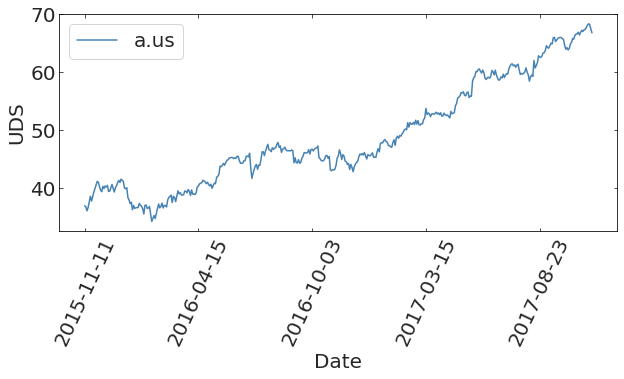

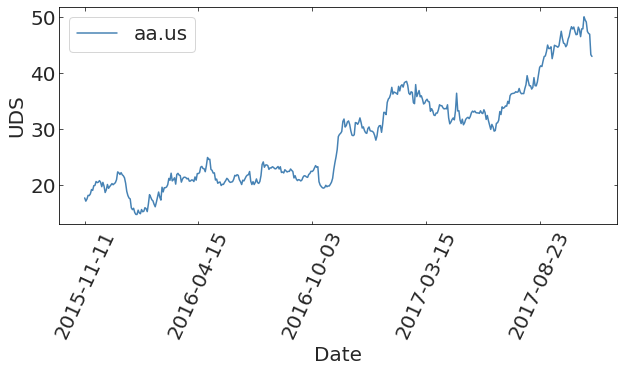

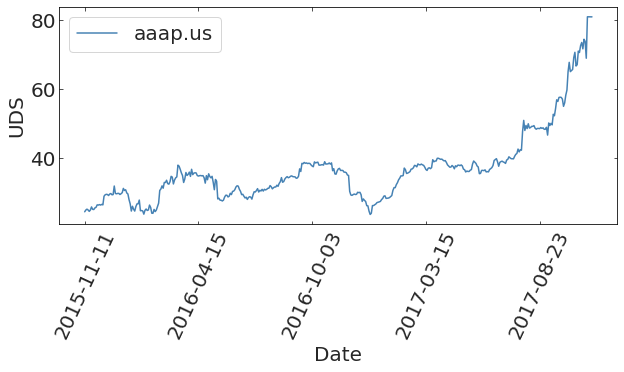

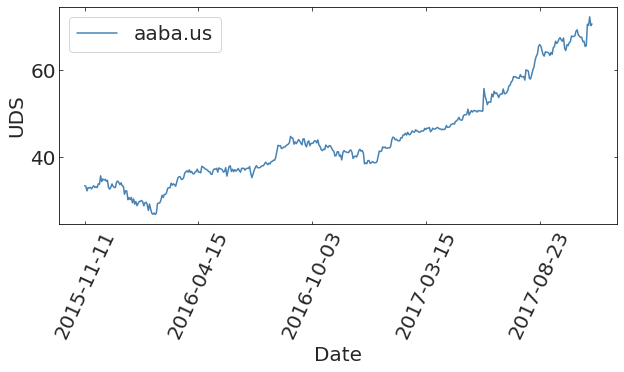

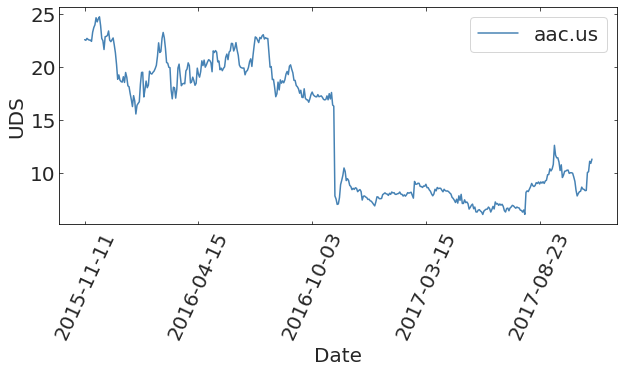

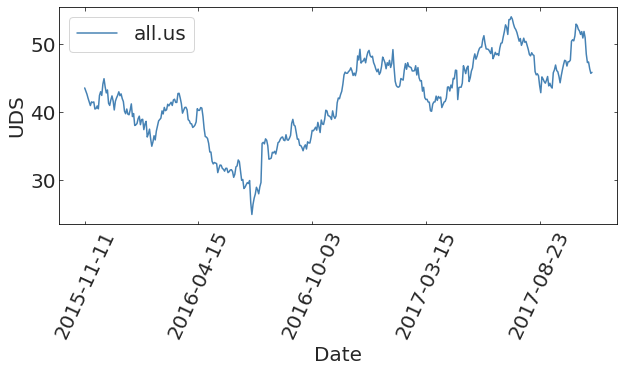

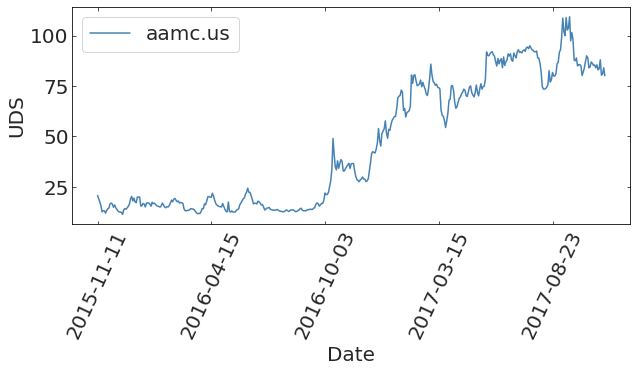

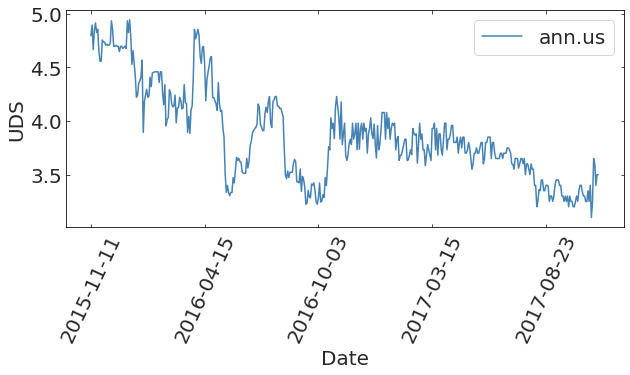

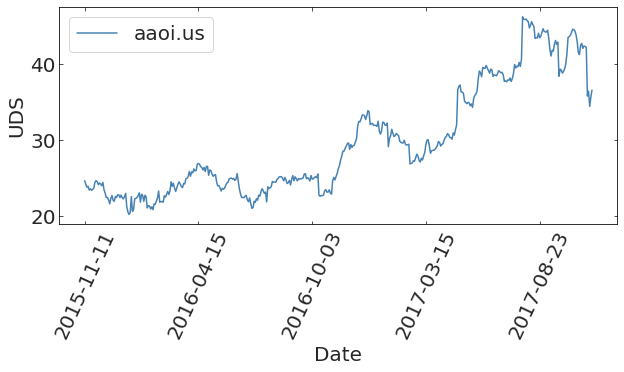

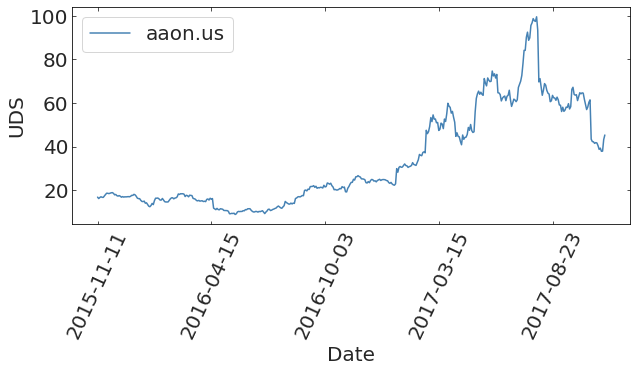

In [ ]:
import matplotlib.pyplot as plt

for i in range(0,10):
    plt.figure(figsize=(10,4))
    plt.plot(tss.iloc[:,i])

    pl.ylabel("UDS", fontsize=20);
    pl.xlabel("Date", fontsize=20);
    plt.xticks(tss.index.values[0:500:100], fontsize = 20, rotation=65)
    plt.yticks(fontsize=20);
    pl.legend(tss.columns[i:], prop={"size":20})

    plt.show()

**Fig 1:** Development of closing prices over a 21-month time period associated with individual stocks.

## visualizing correlations

use ```pandas.plotting.scatter_matrix```  to look at the relationship between lightcurves

plot the pairwise correlation as a heatmap using ```pl.imshow()```. You can access the pairwise correlation with the dataframe method ```df.corr()```

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


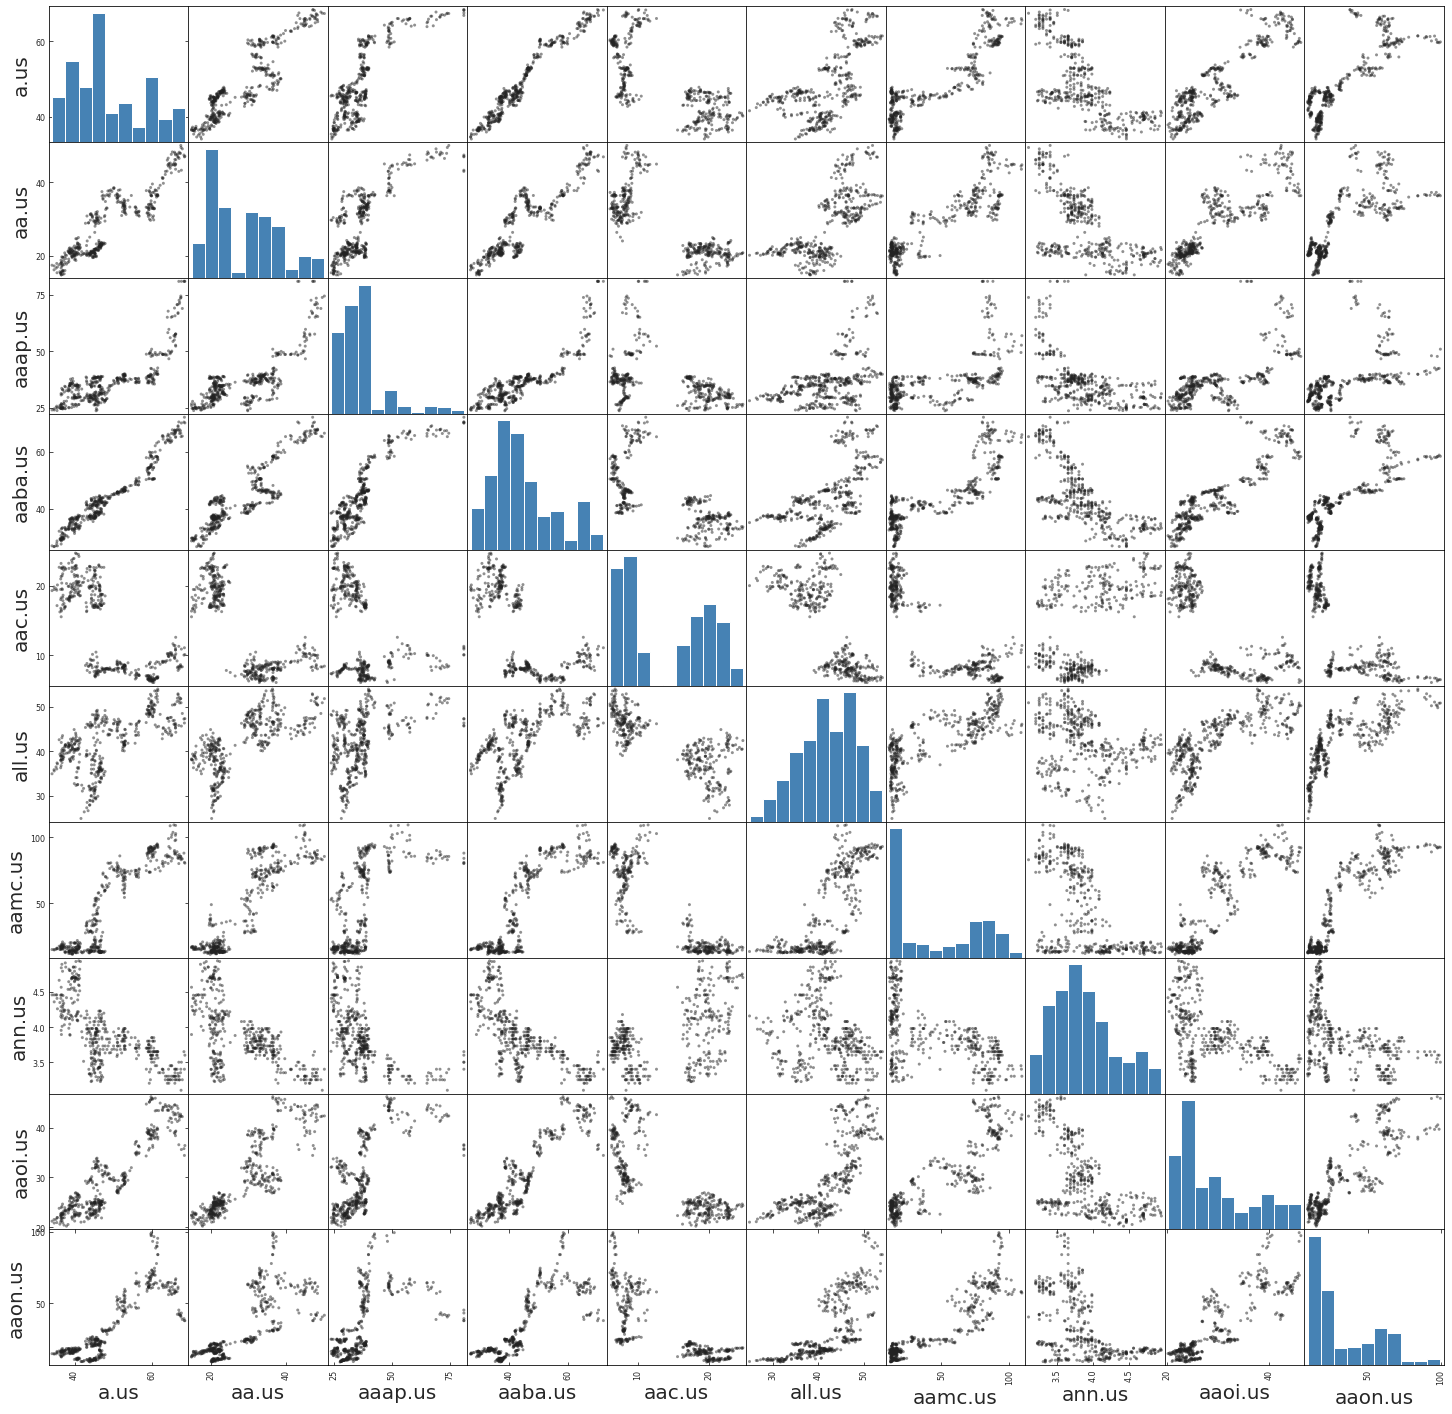

In [ ]:
scatter_matrix(tss, figsize=(25,25), color="#222222");

**Fig 2:** Correlation matrix showing all pairwise combinations of ten stocks. The bar graphs along the diagonal represent a perfect correlation of each stock with itself.

In [ ]:
print("Correlation matrix of 2015-2017 stock values")
tss.corr()

Correlation matrix of 2015-2017 stock values


,a.us,aa.us,aaap.us,aaba.us,aac.us,all.us,aamc.us,ann.us,aaoi.us,aaon.us
a.us,1.000000,0.902139,0.800310,0.973457,-0.721867,0.621041,0.897263,-0.699609,0.905395,0.851239
aa.us,0.902139,1.000000,0.776600,0.904210,-0.791137,0.713229,0.893952,-0.606774,0.873520,0.766459
aaap.us,0.800310,0.776600,1.000000,0.872134,-0.423021,0.451520,0.621329,-0.573976,0.696179,0.560427
aaba.us,0.973457,0.904210,0.872134,1.000000,-0.670578,0.612989,0.849972,-0.709023,0.903785,0.809059
aac.us,-0.721867,-0.791137,-0.423021,-0.670578,1.000000,-0.785248,-0.868936,0.510986,-0.765267,-0.780147
all.us,0.621041,0.713229,0.451520,0.612989,-0.785248,1.000000,0.780517,-0.219258,0.756808,0.746505
aamc.us,0.897263,0.893952,0.621329,0.849972,-0.868936,0.780517,1.000000,-0.544740,0.881631,0.904166
ann.us,-0.699609,-0.606774,-0.573976,-0.709023,0.510986,-0.219258,-0.544740,1.000000,-0.585002,-0.496371
aaoi.us,0.905395,0.873520,0.696179,0.903785,-0.765267,0.756808,0.881631,-0.585002,1.000000,0.860847
aaon.us,0.851239,0.766459,0.560427,0.809059,-0.780147,0.746505,0.904166,-0.496371,0.860847,1.000000


findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


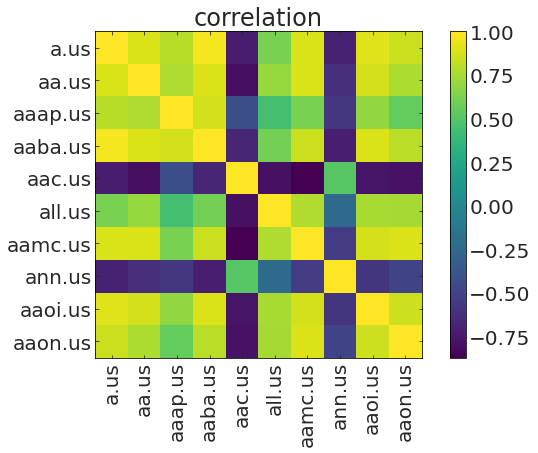

In [ ]:
# you can visualize it as a heat map with imshow
pl.imshow(tss.corr())
pl.colorbar()
pl.title("correlation")
pl.xticks(range(len(tss.columns)), tss.columns, rotation=90)
pl.yticks(range(len(tss.columns)), tss.columns);


**Fig 3:** Heat map visualizing the correlation matrix. Positive correlations are represented by increasingly greenish-yellow shades, while negative correlations are represented by increasingly darker blue colors. The diagonal is bright yellow, because each stock is perfectly correlated with itself (r = 1). 

## testing for stationarity
test if each of these time series is stationary using the AD fuller test using ```statsmodels.api.tsa.stattools.adfuller()```

```for f in tss.columns:
    sm.tsa.stattools.adfuller(tss[c])```

Have the code automatically print a statement about wheather the ts is stationary for each ts (for example in a for loop).

You will have to set a statistival threshold - choose 2-sigma. What fraction of a gaussian distribution is not contained inside of 2-sigma? this is the threshold you want to pass

In [ ]:
import statsmodels
#Null hypothesis: Non Stationarity exists in the series.
#Alternative Hypothesis: Stationarity exists in the series

# establish threshold: 2 sigma includes 95% of the data
threshold = 1 - 0.95
print (f"Stationarity results from the AD Fuller test at a p-value of {round(threshold,2)}")

# check timeseries for stationarity
for f in tss.columns: 
    result = sm.tsa.stattools.adfuller(tss[f])
    sen1 = (f"{f} is stationary:")
    if result[1] > threshold:
        print(sen1 + " " +  "False")
    else:
        print(sen1 + " " +  "True")


Stationarity results from the AD Fuller test at a p-value of 0.05
a.us is stationary: False
aa.us is stationary: False
aaap.us is stationary: False
aaba.us is stationary: False
aac.us is stationary: False
all.us is stationary: False
aamc.us is stationary: False
ann.us is stationary: True
aaoi.us is stationary: False
aaon.us is stationary: False
